In [3]:
import sys
import flap

sys.path.append(r"E:\marci main\Fusion\nti-wavelet-tools\python\utility")
sys.path.append(r"C:\marci main\Fusion\nti-wavelet-tools\python\utility")
import convert_dict_to_flap
sys.path.append(r"E:\marci main\Fusion\nti-wavelet-tools\python\core")
sys.path.append(r"C:\marci main\Fusion\nti-wavelet-tools\python\core")
import core

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cmath

In [ ]:
path = r"E:\marci main\fusion\inputdata\AUGD_35628_tor_bal_raw.sav"
print(path)

obj = core.NWTDataObject()
obj.load_raw_sav(path)

In [ ]:
print(obj.raw_data.data)
flap.list_data_objects(obj.raw_data)

# testing with generated data

In [ ]:
samples = 1000
data = np.random.normal(0,1,samples)
plt.plot(data)

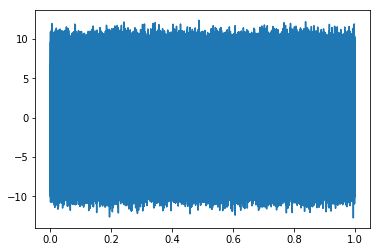

In [5]:
samples = 100000
f=15000
x = np.linspace(start=0,num=samples,stop=1)
data = np.random.normal(0,1,samples)+9*np.sin(f*2*np.pi*x)
plt.plot(x,data)

In [6]:
n = 2*samples**0.5
f_ax, t_ax, stft = scipy.signal.stft(data, nperseg=n, noverlap = n-1, nfft = 1.5*n)

In [ ]:
#%%script false
max = np.max(np.abs(stft))
plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, np.abs(stft), vmin=0, vmax=max, shading='plasma')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig("test_stft_abs")
plt.show()

plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, stft.real, vmin=-max, vmax=max, shading='plasma')
plt.title('STFT Real')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig("test_stft_real")
plt.show()

plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, stft.imag, vmin=-max, vmax=max, shading='plasma')
plt.title('STFT Imag')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig("test_stft_imag")
plt.show()

plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, np.angle(stft), vmin=-6, vmax=6, shading='plasma')
plt.title('STFT Phase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig("test_stft_phase")
plt.show()

In [7]:
search_r=10
ridgei=np.zeros(samples)
amplitude=np.zeros(samples,dtype=complex)
stft_abs=np.abs(stft)
ridgei[0]=np.argmax(stft_abs[:,0])

search_r=int(search_r)
for i in range(1,samples):
    if i%10000 == 0:
        print(ridgei[i-1])
    if ridgei[i-1] > search_r+1:
        ridgei[i]=np.argmax(stft_abs[int(ridgei[0])-search_r:int(ridgei[0])+search_r ,i])+ridgei[0]-search_r
    else: 
        ridgei[i]=np.argmax(stft_abs[0:int(ridgei[0])+search_r ,i])
    amplitude[i]=stft[int(ridgei[i]),i]
print(amplitude)

142.0
142.0
142.0
142.0
142.0
142.0
142.0
142.0
142.0
[ 0.        +0.j         -1.99779059-1.13295597j -0.2610636 -2.29604633j
 ...  1.84558012+1.28887057j  0.04358506+2.2365217j
 -1.77143616+1.34272695j]


In [ ]:
#plt.figure(figsize=(14,11))
#plt.imshow(stft.real,aspect='auto')
#plt.show()

plt.figure(figsize=(14,11))
plt.imshow(np.abs(stft[0:150,:]),aspect='auto')
plt.plot(ridgei[:],"r.-")
#plt.xlim(0,1500)
plt.show()

0j


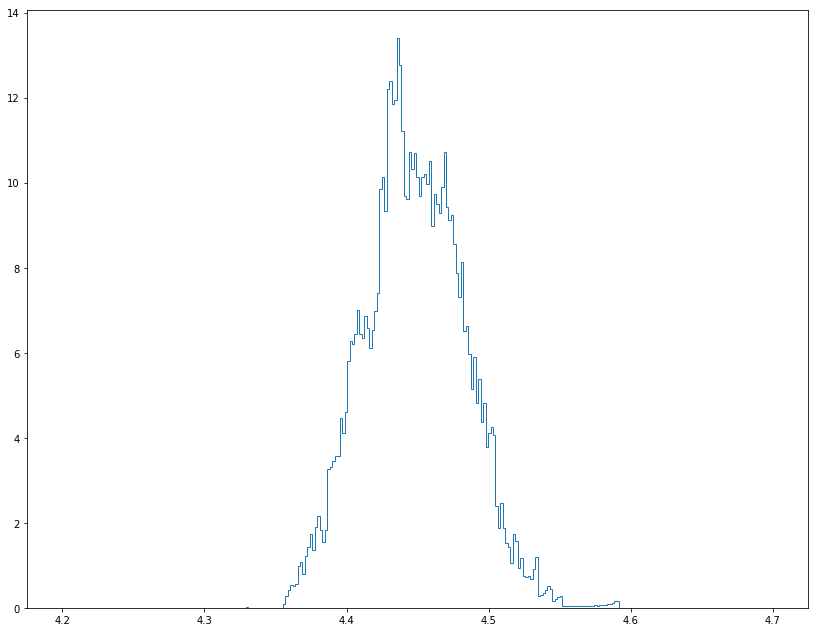

In [144]:
#c = np.abs(chosen).flatten()
#c = chosen.real.flatten()stft[0:15,0:1500]
print(amplitude[0])

#np.seterr(divide='ignore', invalid='ignore')

plt.figure(figsize=(14,11))
n, bins, patches = plt.hist(np.abs(amplitude), bins=287, density = True,facecolor='b',histtype='step',range=(4.2,4.7))#
#plt.xlim(4.2,4.7)
plt.savefig("test_hist")
plt.show()

In [145]:
dist_x=bins[:-1]

scale0=10
#a,b,c = scipy.stats.rice.fit(np.abs(amplitude)*scale0,floc=0,scale=0.37)
print(a,b,c)

#rv=scipy.stats.rice(a,b,c)

1.4999999999999911 0 7.026277479978528e-30


In [146]:
shape_h=200
scale_h=220
diff = np.zeros((shape_h,scale_h))
shape = np.linspace(70,140,shape_h)
scale = np.linspace(0.003,0.05,scale_h)
for i in range(shape_h):
    for j in range(scale_h):
        diff[i,j] = np.average((scipy.stats.rice.pdf(dist_x,shape[i],0.0,scale[j])-n)**2)
    if i%10 == 0:
        print(i)
#print(divmod(diff.argmin(), diff.shape[1]))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


158 151
125.57788944723617 0.035406392694063926


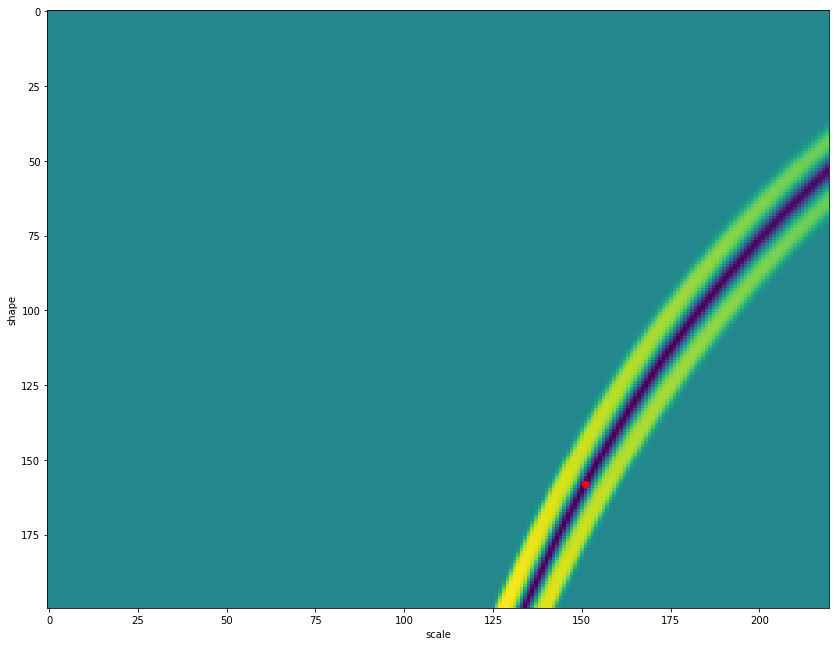

In [147]:
mini = np.min(diff)
x1,y1=np.unravel_index(diff.argmin(), diff.shape)
print(x1,y1)
print(shape[x1],scale[y1])

plt.figure(figsize=(14,11))
plt.imshow(diff,aspect='auto')
plt.plot(y1,x1,'ro')
plt.ylabel("shape")
plt.xlabel("scale")
plt.show()

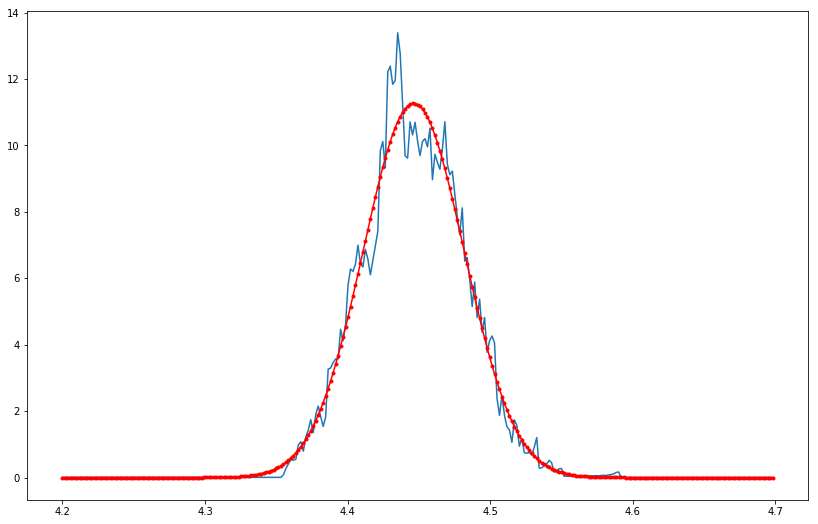

In [150]:
plt.figure(figsize=(14,9))
plt.plot(dist_x,n)#/np.max(n)
#x=np.linspace(3.5,5,500)
#plt.plot(dist_x,rv.pdf(dist_x*scale0)*scale0)#/np.max(rv.pdf(dist_x))
plt.plot(dist_x,scipy.stats.rice.pdf(dist_x,shape[x1],0.0,scale[y1]),'r.-') 
#plt.plot(dist_x,scipy.stats.rice.pdf(dist_x,140.0,0.0,0.032))
plt.savefig("teszt-rician-fit")
plt.show()